### Data Loading and Cleaning

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Data Loading

In [2]:
# Setting working directory to required location
import os
print(os.listdir("../input"))

['companies.txt', 'rounds2.csv', 'mapping.csv']


In [3]:
# reading data files
# using encoding = "ISO-8859-1" to avoid pandas encoding error
rounds = pd.DataFrame(pd.read_csv( "../input/rounds2.csv", encoding = "LATIN-1"))
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
companies = pd.DataFrame(pd.read_csv("../input/companies.txt", sep="\t", encoding = "ISO-8859-1"))
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


### Data inspection

In [5]:
companies.shape

(66368, 10)

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Stash-5,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [8]:
# inspect the structure 
rounds.shape

(114949, 6)

In [9]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [10]:
rounds.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


### Data Cleaning

Ideally, the permalink column in the companies dataframe should be the unique_key of the table, having 66368 unique company names (links, or permalinks).<br>
Also, these 66368 companies should be present in the rounds file.<br>
Let's first confirm that these 66368 permalinks (which are the URL paths of companies' websites) are not repeating in the column, i.e. they are unique.<br>
Also, let's convert all the entries to lowercase (or uppercase) for uniformity.

In [11]:
# converting all permalinks to lowercase
companies['permalink'] = companies['permalink'].str.lower()
len(companies.permalink.unique())

66368

Thus, there are 66368 unique companies in the table and permalink is the unique primary key. Each row represents a unique company.

Let's now check whether all of these 66368 companies are present in the rounds file, and if some extra ones are present

In [12]:
# converting column to lowercase
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
len(rounds.company_permalink.unique())

66370

There seem to be 2 extra permalinks in the rounds file which are not present in the companies file. Let's hope that this is a data quality issue, since if this were genuine, we have two companies whose investment round details are available but their metadata (company name, sector etc.) is not available in the companies table.

Let's have a look at the company permalinks which are in the 'rounds' file but not in 'companies'.
    

In [13]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
16827,/organization/e-cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
18197,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
26139,/organization/huizuche-com-æ ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
58344,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


In [14]:
# Thus, the companies df also contains special characters. Let's treat those as well.

In [15]:
# remove encoding from companies and rounds df
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['name'] = companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

Let's now look at the companies present in the companies df but not in rounds df - ideally there should be none. 

In [16]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [17]:
# Look at unique values again
len(rounds.company_permalink.unique())

66368

Now it makes sense - there are 66368 unique companies in both the rounds and companies dataframes.

It is possible that a similar encoding problems are present in the companies file as well. Let's look at the companies which are present in the companies file but not in the rounds file - if these have special characters, then it is most likely because the companies file is encoded (while rounds is not).

In [18]:
# companies present in companies df but not in rounds df
companies[~companies['permalink'].isin(rounds['company_permalink'])]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [19]:
# quickly verify that there are 66368 unique companies in both
# and that only the same 66368 are present in both files

# unqiue values
print(len(companies.permalink.unique()))
print(len(rounds.company_permalink.unique()))

# present in rounds but not in companies
print(len(rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]))
print(len(companies[~companies['permalink'].isin(rounds['company_permalink'])]))

66368
66368
0
0


In [20]:
# missing values in companies df
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [21]:
# missing values in rounds df
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

Since there are no misisng values in the permalink or company_permalink columns, let's merge the two and then work on the master dataframe.

In [22]:
# merging the two dfs
master = pd.merge(companies, rounds, how="inner", left_on="permalink", right_on="company_permalink")
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [23]:
# removing redundant columns
master =  master.drop(['company_permalink'], axis=1) 

In [24]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Clearly, the column funding_round_code is useless (with about 73% missing values). Also, for the business objectives given, the columns homepage_url, founded_at, state_code, region and city need not be used.

In [25]:
# dropping columns 
master = master.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
master.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [26]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Note that the column raised_amount_usd is an important column, since that is the number we want to analyse (compare, means, sum etc.). That needs to be carefully treated.

Also, the column country_code will be used for country-wise analysis, and category_list will be used to merge the dataframe with the main categories.

Let's first see how we can deal with missing values in raised_amount_usd

In [27]:
# summary stats of raised_amount_usd
master['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

The mean is somewhere around USD 10 million, while the median is only about USD 1m. The min and max values are also miles apart.

In general, since there is a huge spread in the funding amounts, it will be inappropriate to impute it with a metric such as median or mean. Also, since we have quite a large number of observations, it is wiser to just drop the rows.

Let's thus remove the rows having NaNs in raised_amount_usd.

In [28]:
# removing NaNs in raised_amount_usd
master = master[~np.isnan(master['raised_amount_usd'])]
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Let's now look at the column country_code. To see the distribution of the values for categorical variables, it is best to convert them into type 'category'.

In [29]:
country_codes = master['country_code'].astype('category')

In [30]:
# displaying frequencies of each category
country_codes.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
JPN      485
ITA      483
BRA      483
CHE      437
KOR      432
CHL      432
FIN      382
DNK      314
ARG      297
BEL      293
HKG      250
TUR      196
NOR      191
BGR      190
MEX      189
       ...  
KHM        2
DOM        2
MAR        2
MAF        2
KWT        2
NIC        2
ZMB        2
KAZ        2
TUN        2
SOM        1
SYC        1
SEN        1
TGO        1
QAT        1
UZB        1
PSE        1
PRY        1
OMN        1
DMA        1
BLM        1
MNE        1
MKD        1
BRB        1
LAO        1
IRN        1
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

In [31]:
# viewing fractions of counts of country_codes
100*(master['country_code'].value_counts()/len(master.index))

USA    65.342937
GBR     5.285439
CAN     2.754873
CHN     2.029297
IND     1.736539
FRA     1.528028
ISR     1.436409
ESP     1.131014
DEU     1.097316
AUS     0.683453
RUS     0.619215
IRL     0.592887
SWE     0.589728
SGP     0.574985
NLD     0.560242
JPN     0.510747
BRA     0.508641
ITA     0.508641
CHE     0.460199
CHL     0.454933
KOR     0.454933
FIN     0.402279
DNK     0.330669
ARG     0.312767
BEL     0.308554
HKG     0.263272
TUR     0.206405
NOR     0.201139
BGR     0.200086
MEX     0.199033
         ...    
DOM     0.002106
MAR     0.002106
ZWE     0.002106
NIC     0.002106
ZMB     0.002106
BLZ     0.002106
KAZ     0.002106
KHM     0.002106
TUN     0.002106
HND     0.001053
GGY     0.001053
QAT     0.001053
UZB     0.001053
LAO     0.001053
OMN     0.001053
GRD     0.001053
IRN     0.001053
BRB     0.001053
MNE     0.001053
SEN     0.001053
DZA     0.001053
TGO     0.001053
SYC     0.001053
KNA     0.001053
BLM     0.001053
MKD     0.001053
PSE     0.001053
PRY     0.0010

Now, we can either delete the rows having country_code missing (about 6% rows), or we can impute them by USA. Since the number 6 is quite small, and we have a decent amount of data, it may be better to just remove the rows.

Note that np.isnan does not work with arrays of type 'object', it only works with native numpy type (float). Thus, you can use pd.isnull() instead.

In [32]:
# removing rows with missing country_codes
master = master[~pd.isnull(master['country_code'])]

# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Note that the fraction of missing values in the remaining dataframe has also reduced now - only 0.65% in category_list. Let's thus remove those as well.

Note Optionally, you could have simply let the missing values in the dataset and continued the analysis. There is nothing wrong with that. But in this case, since we will use that column later for merging with the 'main_categories', removing the missing values will be quite convenient (and again - we have enough data).

In [33]:
# removing rows with missing category_list values
master = master[~pd.isnull(master['category_list'])]

# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [34]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [35]:
# Now the data looks nice and clean, let's proceed with the analysis.

# Data Analysis

## Funding Type Analysis
This is the first of the three goals of data analysis – investment type analysis. 

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

Seed/angel funding refers to early-stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s. 

Spark Funds wants to choose one of these four investment types for each potential investment they will make. 

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

1. Calculate the average investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

2. Based on the average investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

In [36]:
# first, let's filter the df so it only contains the four specified funding types
df = master[(master.funding_round_type == "venture") | 
            (master.funding_round_type == "angel") | 
            (master.funding_round_type == "seed") | 
            (master.funding_round_type == "private_equity") ]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0



Now, we have to compute a representative value of the funding amount for each type of investment. We can either choose the mean or the median - let's have a look at the distribution of raised_amount_usd to get a sense of the distribution of data.

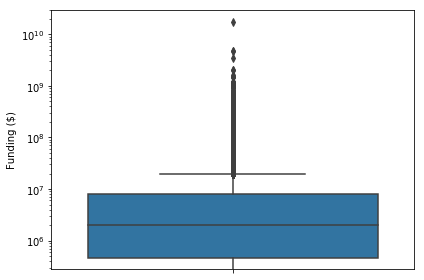

In [37]:
# distribution of raised_amount_usd
plt1 = sns.boxplot(y=df['raised_amount_usd'])
plt.yscale('log')
plt1.set(ylabel = 'Funding ($)')
plt.tight_layout()
plt.show()

In [38]:
# First let's convert funding raised in million USD
df['raised_amount_usd'] = round(df['raised_amount_usd']/1000000,2)

In [39]:
# summary metrics
df['raised_amount_usd'].describe()

count    75124.000000
mean         9.519447
std         77.927784
min          0.000000
25%          0.470000
50%          2.000000
75%          8.000000
max      17600.000000
Name: raised_amount_usd, dtype: float64

Note that there's a significant difference between the mean and the median - USD 9.5m and USD 2m. Let's also compare the summary stats across the four categories.

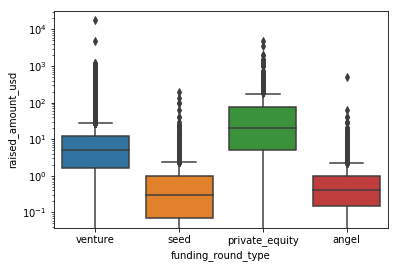

In [40]:
# comparing summary stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

In [41]:
# compare the mean and median values across categories
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                   ...          mean           
funding_round_type  angel private_equity    ...          seed    venture
raised_amount_usd   0.415           20.0    ...      0.747736  11.724214

[1 rows x 8 columns]

Note that there's a large difference between the mean and the median values for all four types. For type venture, for e.g. the median is about 20m while the mean is about 70m.

Thus, the choice of the summary statistic will drastically affect the decision (of the investment type). Let's choose median, since there are quite a few extreme values pulling the mean up towards them - but they are not the most 'representative' values.

In [42]:
# compare the median investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20.000
venture            5.000
angel              0.415
seed               0.300
Name: raised_amount_usd, dtype: float64

The median investment amount for type 'private_equity' is approx. USD 20m, which is beyond Spark Funds' range of 5-15m. The median of 'venture' type is about USD 5m, which is suitable for them. The average amounts of angel and seed types are lower than their range.

Thus, 'venture' type investment will be most suited to them.

## Country Analysis

This is the second goal of analysis — country analysis. 

Now that you know the type of investment suited for Spark Funds, let's narrow down the countries. 

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring. 

Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received) 

Identify the top three English-speaking countries in the data frame top9.

In [43]:
# filter the df for private equity type investments
df = df[df.funding_round_type=="venture"]

# group by country codes and compare the total funding amounts
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
country_wise_total[:9]

country_code
USA    420067.65
CHN     39338.79
GBR     20072.77
IND     14261.56
CAN      9482.20
FRA      7226.81
ISR      6854.34
DEU      6307.00
JPN      3167.67
Name: raised_amount_usd, dtype: float64

Among the top 9 countries, USA, GBR and IND are the top three English speaking countries. Let's filter the dataframe so it contains only the top 3 countries.

In [44]:
# filtering for the top three countries
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0


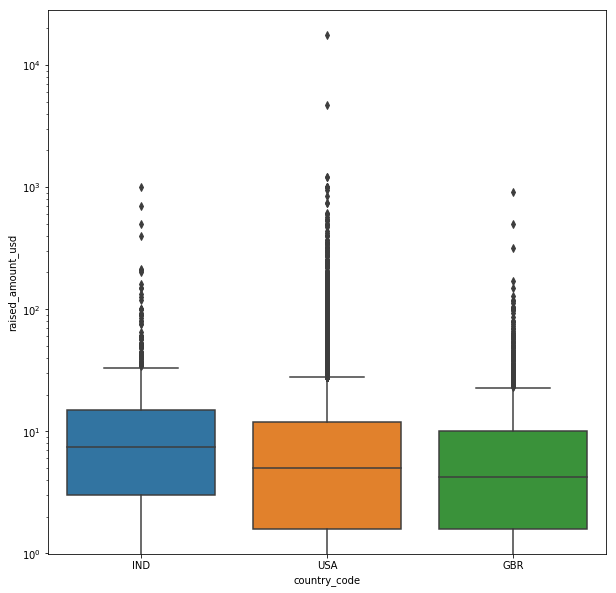

In [45]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

## Sector Analysis
This is the third goal of analysis — sector analysis. 

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’. 

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media. 

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

Extract the primary sector of each category list from the category_list column

Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [46]:
df["category_list"] = df["category_list"].str.split("|").str.get(0)
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9
22,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0


In [47]:
mapping_table = pd.DataFrame(pd.read_csv( "../input/mapping.csv",))
mapping_table.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [48]:
# Code for a merged data frame with each primary sector mapped to its main sector
# (the primary sector should be present in a separate column).
long_map = pd.melt(mapping_table, id_vars=['category_list'], var_name='main_sector')
long_map = long_map[long_map['value']==1]
long_map = long_map.drop('value',1)
long_map.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [49]:
df = pd.merge(df, long_map, on = 'category_list' , how = 'inner')
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,Entertainment
1,/organization/90min,90min,Media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.0,Entertainment
2,/organization/90min,90min,Media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.8,Entertainment
3,/organization/90min,90min,Media,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18.0,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5.0,Entertainment


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36187 entries, 0 to 36186
Data columns (total 10 columns):
permalink                  36187 non-null object
name                       36187 non-null object
category_list              36187 non-null object
status                     36187 non-null object
country_code               36187 non-null object
funding_round_permalink    36187 non-null object
funding_round_type         36187 non-null object
funded_at                  36187 non-null object
raised_amount_usd          36187 non-null float64
main_sector                36187 non-null object
dtypes: float64(1), object(9)
memory usage: 3.0+ MB


## Sector Analysis
Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, we refer to one of the eight main sectors.

Also, you know the top three English speaking countries and the most suitable funding type for Spark Funds. Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'. 

Also, the range of funding preferred by Spark Funds is 5 to 15 million USD. 

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

All the columns of the master_frame along with the primary sector and the main sector

The total number (or count) of investments for each main sector in a separate column

The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector.

In [51]:
# summarising the sector-wise number and sum of venture investments across three countries

# first, let's also filter for investment range between 5 and 15m
df = df[(df['raised_amount_usd'] >= 5) & (df['raised_amount_usd'] <= 15)]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,Entertainment
1,/organization/90min,90min,Media,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.0,Entertainment
2,/organization/90min,90min,Media,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.8,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5.0,Entertainment
14,/organization/chefs-feed,ChefsFeed,Media,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5.0,Entertainment


In [52]:
# First english speaking company 'USA' for funding type venture
D1 = df[df.country_code == 'USA']
# Second english speaking company 'Great Britain' for funding type venture
D2 = df[df.country_code == 'GBR']
# Third english speaking company 'India' for funding type venture
D3 = df[df.country_code == 'IND']

In [53]:
# groupby country, sector and compute the count and sum
df.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count', 'sum'])

count       sum
country_code main_sector                                             
GBR          Automotive & Sports                         16    167.06
             Cleantech / Semiconductors                 127   1136.89
             Entertainment                               54    461.52
             Health                                      24    214.51
             Manufacturing                               42    361.95
             News, Search and Messaging                  73    615.75
             Others                                     144   1264.15
             Social, Finance, Analytics, Advertising     98    821.88
IND          Automotive & Sports                         13    136.90
             Cleantech / Semiconductors                  20    165.38
             Entertainment                               33    280.83
             Health                                      19    167.74
             Manufacturing                               21    200.90
             News, Search and Messaging                  52    433.84
             Others                                     109   1007.41
             Social, Finance, Analytics, Advertising     32    290.54
USA          Automotive & Sports                        167   1454.11
             Cleantech / Semiconductors                2302  21226.02
             Entertainment                              580   5000.22
             Health                                     913   8255.94
             Manufacturing                              805   7308.56
             News, Search and Messaging                1567  13816.79
             Others                                    2931  26149.28
             Social, Finance, Analytics, Advertising   1916  16710.71

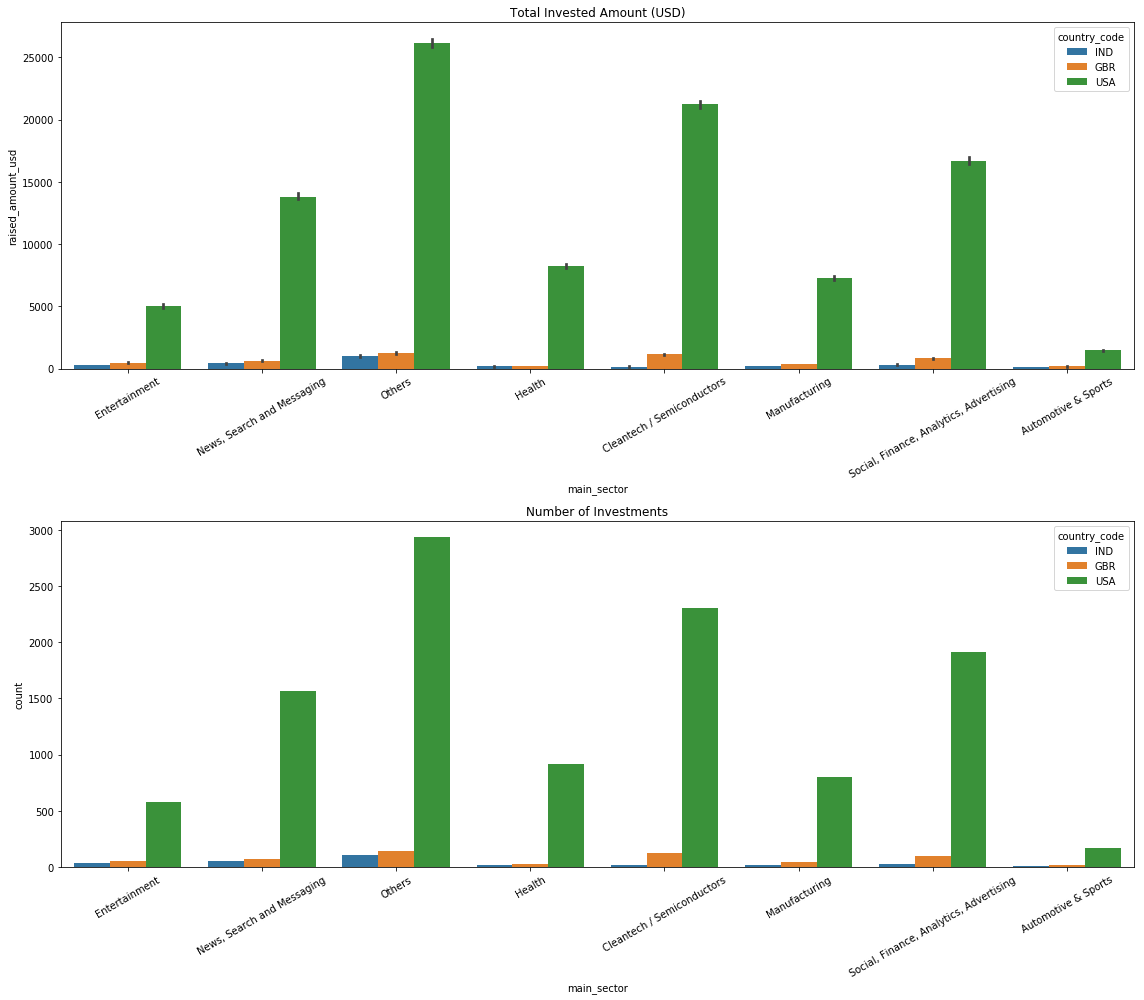

In [54]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='main_sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='main_sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')

plt.tight_layout()
plt.show()